In [1]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [3]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile

In [4]:
survey  = 'desi'
version = 'GAMA4'
dryrun  = False

In [5]:
gold    = Table.read(findfile(ftype='gold', survey=survey)) 
gold

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GOOD_Z,ZDESI,FIELD,GAMA_FIELD,GMAG_DRED,RMAG_DRED,W1MAG_DRED,W2MAG_DRED,GMR,DETMAG,LEGACYPET,IN_GOLD,IN_CLUSTERING,IN_FULL,WEIGHT_ZFAIL,WEIGHT,NZ,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,COMP_TILE,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,LUMDIST,DISTMOD,IN_D8LUMFN,CONSERVATIVE,ZSURV
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,,,,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bool,float64,bytes3,bytes3,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,float64,float64,float64,int64,bytes43,bytes143,bool,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64
39627733927462346,8692.672918319702,121.68951238388622 .. -14.996086956969426,3.8697103852301554e-05,0,7886,GALAXY,--,10,301.08885838184506,0,212.07182231138097,-2.1576366940231786,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,318256,1482,SER,5.435668,15.029476,29.7828,334.7293,124.587234,36.408154,0,0,--,0.0,0.0,0.0,0.0,2121m022,0.059076868,28.868391,23.604856,2.337881,0.5745999,2.3560472,6.5144067,12.909119,2.3666756,6.5423255,12.962651,2.4321775,0.82148373,0.07292092,-0.32329565,S,102100,9,1152921504606846976,131074,0,0,0,0,0,212.07182231138097,-2.1576366940231786,1,329.2138,1,1,-0.004,0.004,0.001,0.001,212.0718068853151,0.0,-2.157639871379078,0.0,0.7514636,17,1.7193414733275092,True,0.2083179377892946,R17,NAN,20.471994,19.429739,18.838074,19.060822,1.0422554,19.429739,19.54974,True,True,True,1.0,3.0714285714285716,0.011040410670367769,1,532,5321463,True,1,0.5714285714285714,0.3333333333333333,37439489807543353 .. 6991981798404131877,0.3203125,-507.1203432685779,-317.768561089396,-22.547181101771436,594.3603441810435,-11.580419903600614,-72.51173345845032,723.6364599106233,39.29760220179492,0,0,0.2083179377892946
39627733927463584,8176.399510648102,660.3244540502434 .. 24.759004304342646,8.205159057958459e-05,0,7898,GALAXY,--,10,121.10065173427574,0,212.13195284744052,-2.1397232701515705,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.7673615329420017,516,9010,318256,2720,DEV,14.839426,41.38945,79.33491,116.59784,49.463898,5.1840606,0,0,--,0.0,0.0,0.0,0.0,2121m022,0.059687406,63.37836,41.3755,1.200657,0.30872032,2.495411,6.960086,13.341027,2.495411,6.960086,13.341027,4.0,3.4901268,-0.29501644,0.15657933,S,102100,9,1152921504606846976,131074,0,0,0,0,0,212.13195284744052,-2.1397232701

In [6]:
sorted(gold.dtype.names)

['BGS_TARGET',
 'BITWEIGHTS',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'CHI2',
 'COADD_EXPTIME',
 'COADD_FIBERSTATUS',
 'COADD_NUMEXP',
 'COADD_NUMNIGHT',
 'COADD_NUMTILE',
 'COEFF',
 'COMP_TILE',
 'CONSERVATIVE',
 'DELTACHI2',
 'DESI_TARGET',
 'DETMAG',
 'DISTMOD',
 'EBV',
 'FA_TARGET',
 'FA_TYPE',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'FIELD',
 'FLUX_G',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_Z',
 'FLUX_R',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_Z',
 'FRACZ_TILELOCID',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'GAMA_FIELD',
 'GMAG_DRED',
 'GMR',
 'GOOD_Z',
 'IN_CLUSTERING',
 'IN_D8LUMFN',
 'IN_FULL',
 'IN_GOLD',
 'LEGACYPET',
 'LOCATION_ASSIGNED',
 'LUMDIST',
 'MASKBITS',
 'MEAN_DELTA_X',
 'MEAN_DELTA_Y',
 'MEAN_FIBER_DEC',
 'MEAN_FIBER_RA',
 'MEAN_PSF_TO_FIBER_SPECFLUX',
 'MORPHTYPE',
 'MWS_TARGET',
 

In [7]:
gold['BITWEIGHTS'].shape

(31250, 2)

In [8]:
np.mean(gold['IN_CLUSTERING'].data)

1.0

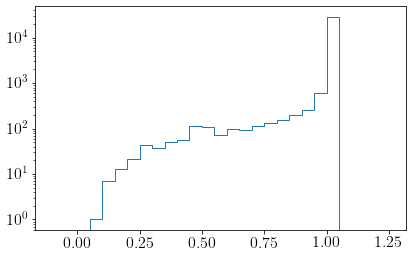

In [11]:
pl.hist(gold['PROB_OBS'].data, bins=np.arange(-0.1, 1.3, 0.5e-1), histtype='step')
pl.yscale('log')

(-2.5, 7.5)

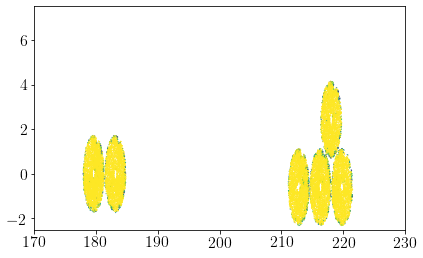

In [14]:
pl.scatter(gold['TARGET_RA'], gold['TARGET_DEC'], marker='.', c=gold['PROB_OBS'], lw=0.0, vmin=0., vmax=1., s=5)

pl.xlim(170., 230.)
pl.ylim(-2.5,  7.5)

(-1.8, 1.9)

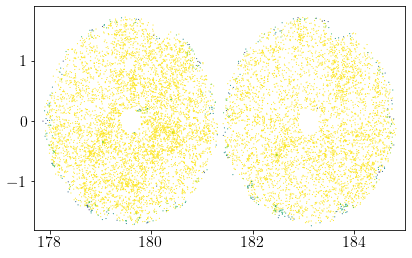

In [15]:
pl.scatter(gold['TARGET_RA'], gold['TARGET_DEC'], marker='.', c=gold['PROB_OBS'], lw=0.0, vmin=0., vmax=1., s=5)

pl.xlim(177.7, 185.)
pl.ylim(-1.8,  1.9)

# Done.